# **First model for the project**

# **Load lib**

In [4]:
!pip install pyvi > /dev/null 2>&1
import numpy as np
import pandas as pd
import tensorflow as tf
import pickle
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Embedding, Dense, Dropout, Bidirectional, LSTM, GRU, Input,MaxPooling1D, GlobalMaxPooling1D, LayerNormalization, Conv1D
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from pyvi import ViTokenizer
from pyvi import ViUtils

# **Load data**

In [5]:
df = pd.read_csv('https://raw.githubusercontent.com/hungitnoi/model-for-project/refs/heads/master/s.csv')
label_mapping = {
    -1: "tiêu cực",
    0: "trung lập",
    1: "tích cực"
}
df['label'] = df['label'].map(label_mapping)
df


,Unnamed: 0,comment,label
0,0,Áo bao đẹp ạ!!,tích cực
1,1,Tuyệt vời !,tích cực
2,2,2day ao khong giong trong.,tiêu cực
3,3,"Mùi thơm,bôi lên da mềm da.",tích cực
4,4,"Vải đẹp, dày dặn.",tích cực
...,...,...,...
31455,31455,Không đáng tiền.,tiêu cực
31456,31456,Quần rất đẹp.,tích cực
31457,31457,Hàng đẹp đúng giá tiền.,tích cực
31458,31458,Chất vải khá ổn.,tích cực


# **Data preparation and preprocessing for tranning**

## data separation as Input_label and input_data



### Input_label: target variable

In [6]:
Input_label = df['label']
Input_label

,label
0,tích cực
1,tích cực
2,tiêu cực
3,tích cực
4,tích cực
...,...
31455,tiêu cực
31456,tích cực
31457,tích cực
31458,tích cực


### input_data: data features

In [7]:
input_data = df['comment']
input_data

,comment
0,Áo bao đẹp ạ!!
1,Tuyệt vời !
2,2day ao khong giong trong.
3,"Mùi thơm,bôi lên da mềm da."
4,"Vải đẹp, dày dặn."
...,...
31455,Không đáng tiền.
31456,Quần rất đẹp.
31457,Hàng đẹp đúng giá tiền.
31458,Chất vải khá ổn.


###Processing data

In [8]:
label_dict = {'tiêu cực':0, 'trung lập':1, 'tích cực':2}

input_pre=[]
label_with_accent=[]
for idx,dt in enumerate(input_data):
  input_text_pre=list(tf.keras.preprocessing.text.text_to_word_sequence(dt))
  input_text_pre=" ".join(input_text_pre)
  input_text_pre_no_accent=str(ViUtils.remove_accents(input_text_pre).decode("utf-8"))
  input_text_pre_accent=ViTokenizer.tokenize(input_text_pre)
  input_text_pre_no_accent=ViTokenizer.tokenize(input_text_pre_no_accent)
  input_pre.append(input_text_pre_accent)
  input_pre.append(input_text_pre_no_accent)
  label_with_accent.append(Input_label[idx])
  label_with_accent.append(Input_label[idx])

<function matplotlib.pyplot.show(close=None, block=None)>

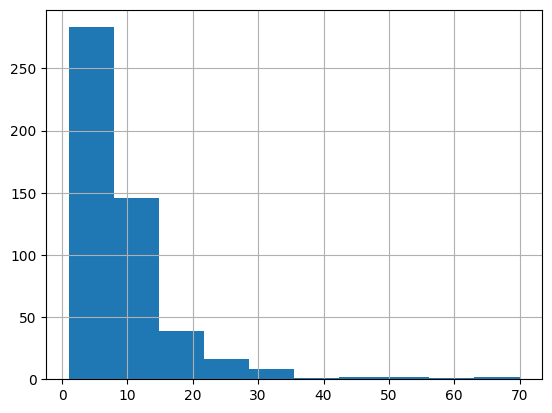

In [9]:
seq_len= [len(i.split()) for i in input_pre[0:500]]
pd.Series(seq_len).hist(bins=10)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

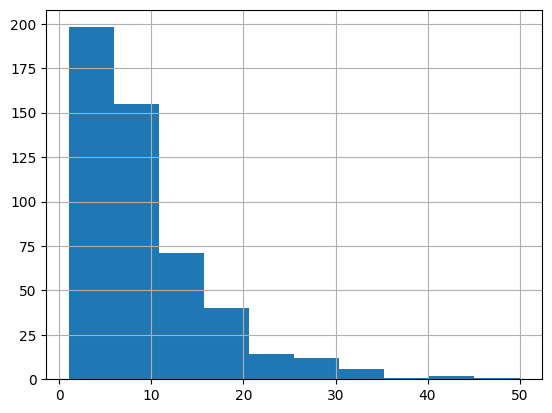

In [10]:
seq_len= [len(i.split()) for i in input_pre[500:1000]]
pd.Series(seq_len).hist(bins=10)
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

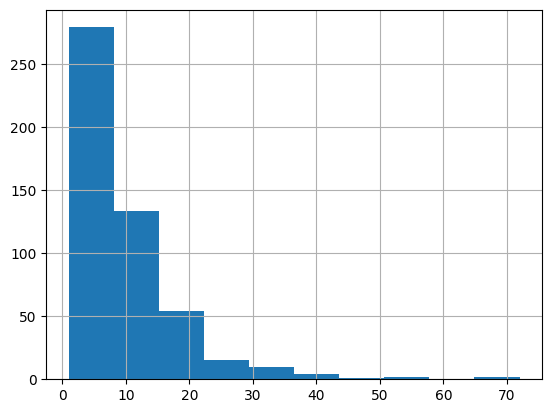

In [11]:
seq_len= [len(i.split()) for i in input_pre[1000:1500]]
pd.Series(seq_len).hist(bins=10)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

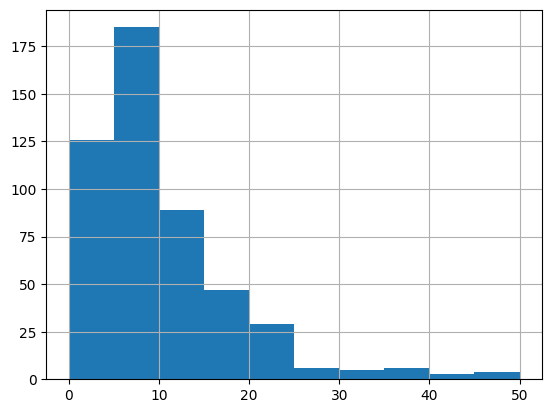

In [12]:
seq_len= [len(i.split()) for i in input_pre[1500:2000]]
pd.Series(seq_len).hist(bins=10)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

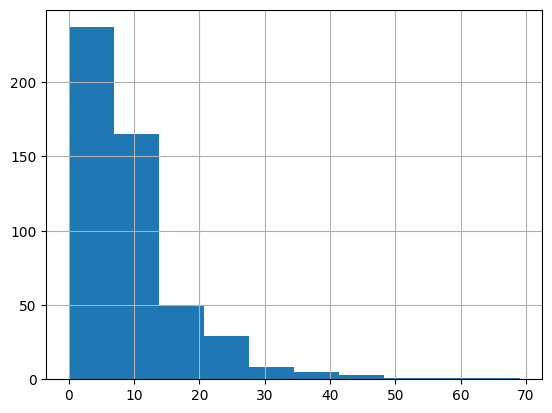

In [13]:
seq_len= [len(i.split()) for i in input_pre[2000:2500]]
pd.Series(seq_len).hist(bins=10)
plt.show

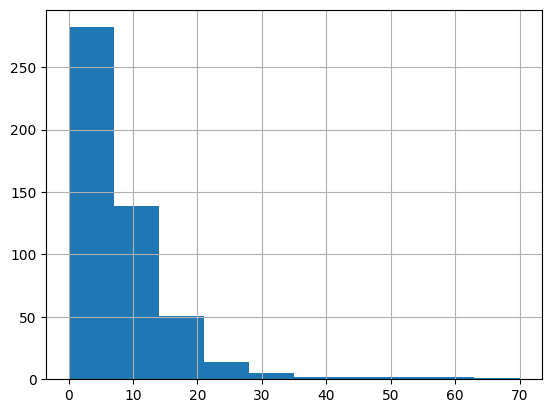

In [14]:
seq_len= [len(i.split()) for i in input_pre[2500:3000]]
pd.Series(seq_len).hist(bins=10)
plt.show()

In [15]:
#As we see over 6 chart, the mean of word in 1 sentenc is about 335 words, so we use it!
lable_idx=[label_dict[i] for i in label_with_accent]
lable_tf=tf.keras.utils.to_categorical(lable_idx,num_classes=3)

tokenizer_data=Tokenizer(oov_token='<OOV>', filters='',split= ' ')
tokenizer_data.fit_on_texts(input_pre)

tokenized_data_text = tokenizer_data.texts_to_sequences(input_pre) #Change text_to_word_sequence to text_to_sequences
vec_data = pad_sequences(tokenized_data_text, padding='post', maxlen=335)

pickle.dump(tokenizer_data, open("tokenizer_data.pkl", "wb"))

print("input data.shape",vec_data.shape)
data_vocab_size=len(tokenizer_data.word_index)+1
print("data_vocab_size",data_vocab_size)

x_train,x_val,y_train,y_val=train_test_split(vec_data,lable_tf,test_size=0.2,random_state=42)
x_train,x_test,y_train,y_test=train_test_split(x_train,y_train,test_size=0.1,random_state=42)
print("Training sample",len(x_train))
print("Validation sample",len(x_val))
print("Test sample",len(x_test))

input data.shape (62920, 335)
data_vocab_size 9913
Training sample 45302
Validation sample 12584
Test sample 5034


##Create Model from Scracth

In [22]:
def generate_model():
    dropout_threshold = 0.4
    input_dim = data_vocab_size
    output_dim = 32
    input_length = 335
    initializer = tf.keras.initializers.GlorotNormal()
    #regularizer = tf.keras.regularizers.l2(0.01)  # Add L2 regularization

    input_layer = Input(shape=(input_length,))
    feature = Embedding(input_dim=input_dim, output_dim=output_dim,
                        input_length=input_length, embeddings_initializer="GlorotNormal")(input_layer)

    cnn_feature = Conv1D(filters=32, kernel_size=3, padding='same', activation='relu')(feature)
    cnn_feature = MaxPooling1D()(cnn_feature)
    cnn_feature = Dropout(dropout_threshold)(cnn_feature)
    cnn_feature = Conv1D(filters=32, kernel_size=3, padding='same', activation='relu')(cnn_feature)
    cnn_feature = MaxPooling1D()(cnn_feature)
    cnn_feature = LayerNormalization()(cnn_feature)
    cnn_feature = Dropout(dropout_threshold)(cnn_feature)

    bi_lstm_feature = Bidirectional(LSTM(units=32, dropout=dropout_threshold, return_sequences=True, kernel_initializer=initializer), merge_mode='concat')(feature)
    bi_lstm_feature = MaxPooling1D()(bi_lstm_feature)

    bi_lstm_feature = Bidirectional(GRU(units=32, dropout=dropout_threshold, return_sequences=True, kernel_initializer=initializer), merge_mode='concat')(bi_lstm_feature)
    bi_lstm_feature = MaxPooling1D()(bi_lstm_feature)
    bi_lstm_feature = LayerNormalization()(bi_lstm_feature)

    combine_feature = tf.keras.layers.Concatenate()([cnn_feature, bi_lstm_feature])
    combine_feature = GlobalMaxPooling1D()(combine_feature)
    combine_feature = LayerNormalization()(combine_feature)

    classifier = Dense(90, activation='relu')(combine_feature)
    classifier = Dropout(0.2)(classifier)  # Adjusted Dropout rate
    classifier = Dense(70, activation='relu')(classifier)
    classifier = Dropout(0.2)(classifier)
    classifier = Dense(50, activation='relu')(classifier)
    classifier = Dropout(0.2)(classifier)
    classifier = Dense(30, activation='relu')(classifier)
    # classifier = Dropout(0.2)(classifier)
    # classifier = Dense(20, activation='relu')(classifier)
    # classifier = Dropout(0.2)(classifier)
    # classifier = Dense(10, activation='relu')(classifier)
    # classifier = Dropout(0.2)(classifier)
    # classifier = Dense(5, activation='relu')(classifier)
    # classifier = Dropout(0.2)(classifier)
    classifier = Dense(3, activation='softmax')(classifier)
    model = tf.keras.Model(inputs=input_layer, outputs=classifier)

    return model

model = generate_model()
adam = Adam(learning_rate=0.001)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2             │ (None, 335)            │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_2 (Embedding)   │ (None, 335, 32)        │        317,216 │ input_layer_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_4 (Conv1D)         │ (None, 335, 32)        │          3,104 │ embedding_2[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling1d_8           │ (None, 167, 32)        │              0 │ conv1d_4[0][0]         │
│ (MaxPooling1D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_18 (Dropout)      │ (None, 167, 32)        │              0 │ max_pooling1d_8[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bidirectional_4           │ (None, 335, 64)        │         16,640 │ embedding_2[0][0]      │
│ (Bidirectional)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_5 (Conv1D)         │ (None, 167, 32)        │          3,104 │ dropout_18[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling1d_10          │ (None, 167, 64)        │              0 │ bidirectional_4[0][0]  │
│ (MaxPooling1D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling1d_9           │ (None, 83, 32)         │              0 │ conv1d_5[0][0]         │
│ (MaxPooling1D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bidirectional_5           │ (None, 167, 64)        │         18,816 │ max_pooling1d_10[0][0] │
│ (Bidirectional)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ layer_normalization_6     │ (None, 83, 32)         │             64 │ max_pooling1d_9[0][0]  │
│ (LayerNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling1d_11          │ (None, 83, 64)         │              0 │ bidirectional_5[0][0]  │
│ (MaxPooling1D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_19 (Dropout)      │ (None, 83, 32)         │              0 │ layer_normalization_6… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ layer_normalization_7     │ (None, 83, 64)         │            128 │ max_pooling1d_11[0][0] │
│ (LayerNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_2             │ (None, 83, 96)         │              0 │ dropout_19[0][0],      │
│ (Concatenate)        

 Total params: 379,537 (1.45 MB)

 Trainable params: 379,537 (1.45 MB)

 Non-trainable params: 0 (0.00 B)

##Visualize the model

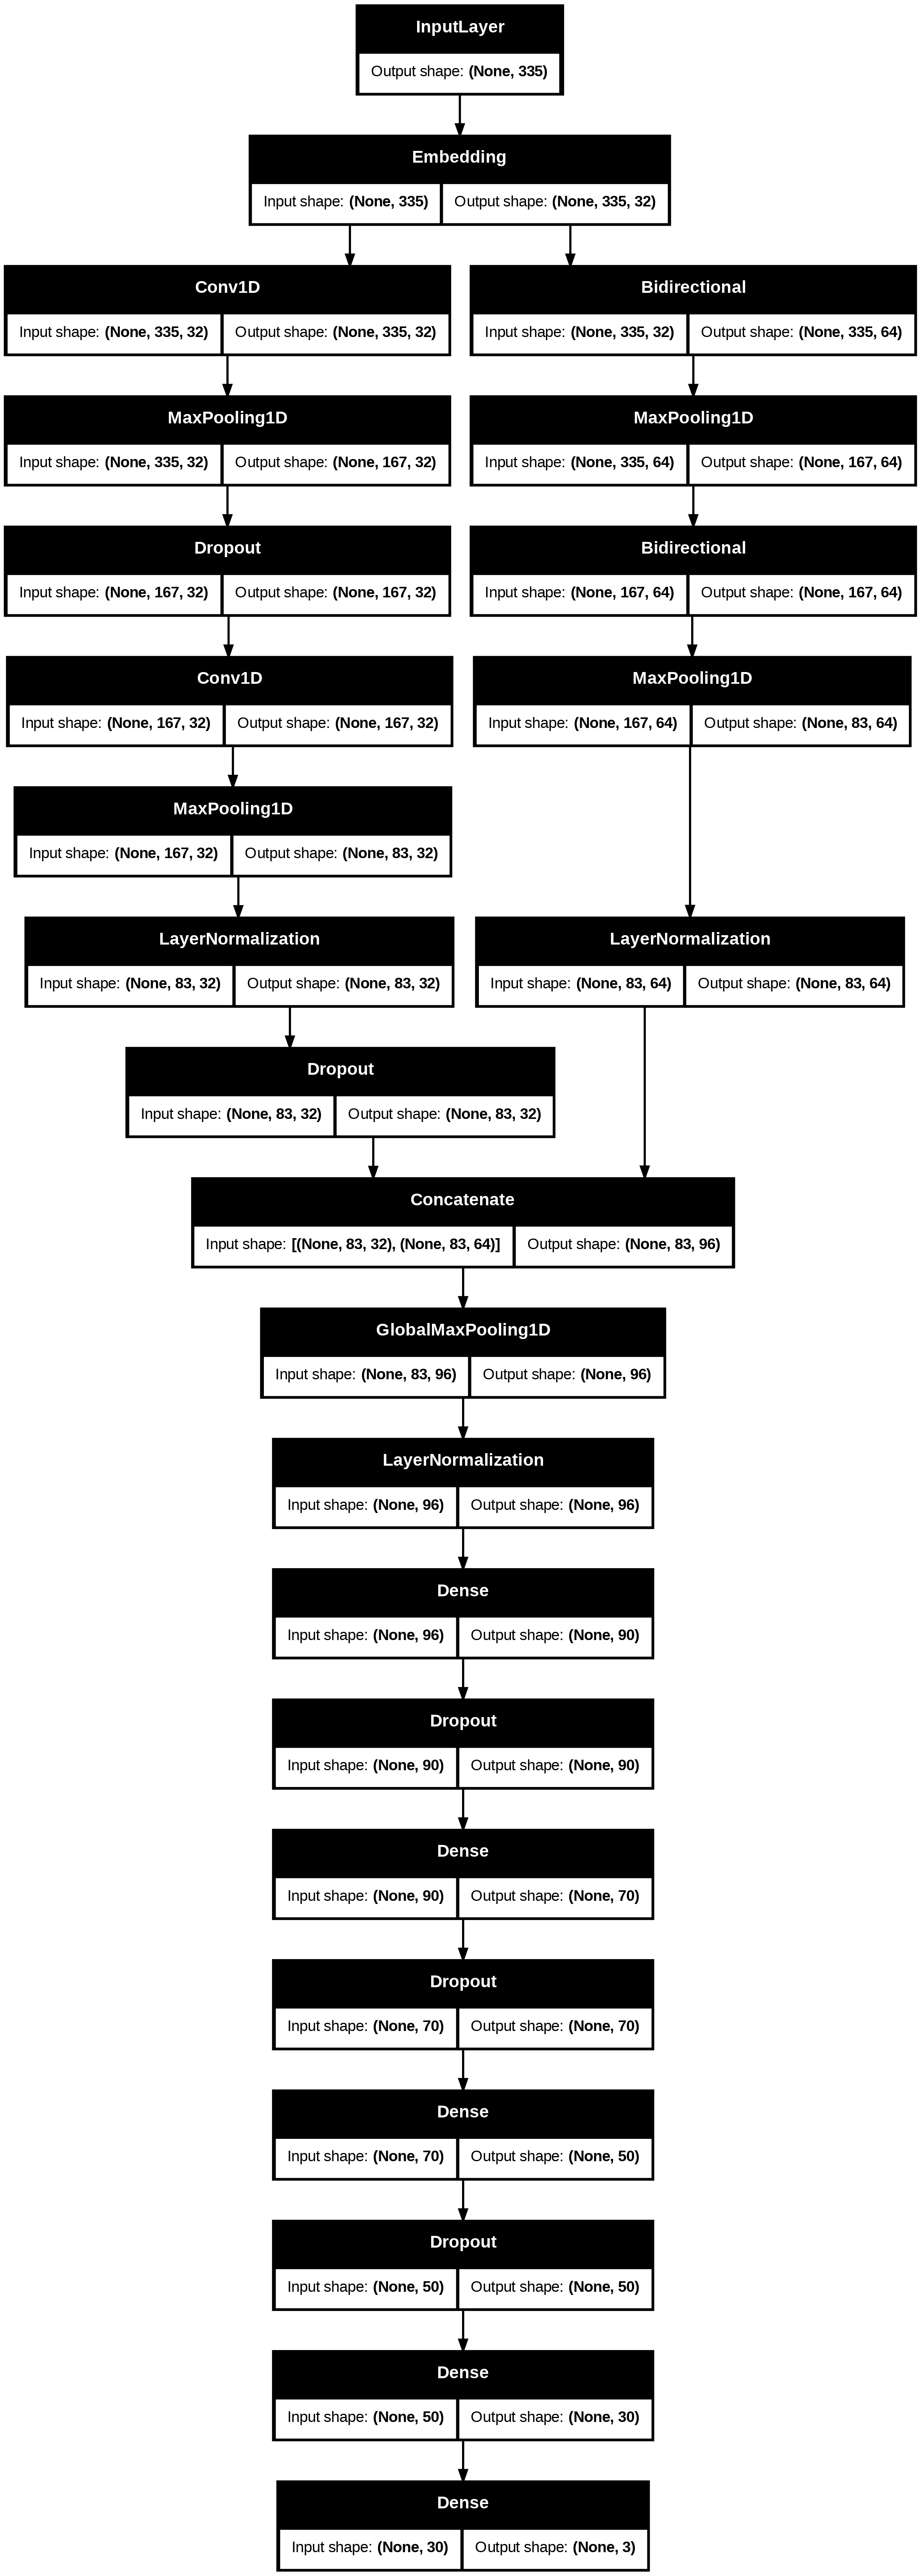

In [23]:
dot_img_file='model_1.png'
tf.keras.utils.plot_model(model, to_file=dot_img_file, show_shapes=True)

##Define model checkpoint and training

In [24]:
callback_model = tf.keras.callbacks.ModelCheckpoint('model_cnn_bilstm.keras', monitor='val_loss')
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit(x=x_train, y=y_train,validation_data=(x_val, y_val),epochs=10,batch_size=128,callbacks=[callback_model, early_stopping])


Epoch 1/10
354/354 ━━━━━━━━━━━━━━━━━━━━ 312s 853ms/step - accuracy: 0.6587 - loss: 0.8440 - val_accuracy: 0.7846 - val_loss: 0.5435
Epoch 2/10
354/354 ━━━━━━━━━━━━━━━━━━━━ 313s 829ms/step - accuracy: 0.7865 - loss: 0.5442 - val_accuracy: 0.7915 - val_loss: 0.5150
Epoch 3/10
354/354 ━━━━━━━━━━━━━━━━━━━━ 320s 823ms/step - accuracy: 0.8028 - loss: 0.4936 - val_accuracy: 0.7998 - val_loss: 0.5049
Epoch 4/10
354/354 ━━━━━━━━━━━━━━━━━━━━ 291s 823ms/step - accuracy: 0.8141 - loss: 0.4690 - val_accuracy: 0.7997 - val_loss: 0.5002
Epoch 5/10
354/354 ━━━━━━━━━━━━━━━━━━━━ 320s 819ms/step - accuracy: 0.8267 - loss: 0.4384 - val_accuracy: 0.7994 - val_loss: 0.5034
Epoch 6/10
354/354 ━━━━━━━━━━━━━━━━━━━━ 327s 831ms/step - accuracy: 0.8330 - loss: 0.4253 - val_accuracy: 0.7983 - val_loss: 0.5070
Epoch 7/10
354/354 ━━━━━━━━━━━━━━━━━━━━ 319s 825ms/step - accuracy: 0.8451 - loss: 0.4010 - val_accuracy: 0.7934 - val_loss: 0.5123
Epoch 8/10
354/354 ━━━━━━━━━━━━━━━━━━━━ 324s 830ms/step - accuracy: 0.8474 -

In [ ]:
model.load_weights('model_cnn_bilstm.keras')
model.evaluate(x_test,y_test)

##Inference Model with input test

In [25]:
def preprocess_raw_input(raw_input, tokenizer):
    input_text_pre = list(tf.keras.preprocessing.text.text_to_word_sequence(raw_input))
    input_text_pre = " ".join(input_text_pre)
    input_text_pre_accent = ViTokenizer.tokenize(input_text_pre)
    print("Text preprocessed: ", input_text_pre_accent)
    tokenized_data_text = tokenizer.texts_to_sequences([input_text_pre_accent])
    # Changed maxlen to 335 to match the training data shape
    vec_data = pad_sequences(tokenized_data_text, padding='post', maxlen=335)
    return vec_data

def inference_model(input_feature, model):
  output = model(input_feature).numpy()[0]
  result = output.argmax()
  conf = float(output.max())
  # label_dict = defaultdict(lambda: -2)  # Gán -2 cho các khóa không tồn tại
  # label_dict['tiêu cực'] = -1
  # label_dict['tích cực'] = 1
  # label_dict['trung lập'] = 0
  label_dict = {'tiêu cực':0, 'trung lập':1, 'tích cực':2}
  label = list(label_dict.keys())
  return label[int(result)], conf

def prediction(raw_input,tokenizer,model):
  input_model = preprocess_raw_input(raw_input,tokenizer_data)
  result, conf = inference_model(input_model, model)
  return result, conf

my_model = generate_model()
my_model = load_model('model_cnn_bilstm.keras')
with open(r"tokenizer_data.pkl", "rb") as input_file:
    my_tokenizer = pickle.load(input_file)

print(prediction("sữa chua ngon lắm",my_tokenizer,my_model))

Text preprocessed:  sữa_chua ngon lắm
('tích cực', 0.9463092088699341)


In [26]:
while(True):
  text = input()
  if text == "end":
    break
  else:
    # Convert the prediction result to a string using str()
    print(str(prediction(text,my_tokenizer,my_model)[0])+"\n")

Anh Chị thi cuối kỳ cho tốt!
Text preprocessed:  anh_chị thi cuối kỳ cho tốt
tích cực

Nên mua con này k ae
Text preprocessed:  nên mua con này k ae
tiêu cực

Phải chi đi thi cũng như lúc chơi Kahoot giật give away 
Text preprocessed:  phải chi đi thi cũng như lúc chơi kahoot giật give away
tiêu cực

 ƯU ĐÃI SIÊU HOT DÀNH CHO CÁC BẠN SINH VIÊN 
Text preprocessed:  ưu_đãi siêu hot dành cho các bạn sinh_viên
tích cực

MENU ĐỒNG GIÁ 23K (𝐦𝐢𝐱 𝟐 𝐦𝐨́𝐧)
Text preprocessed:  menu đồng giá 23k 𝐦𝐢𝐱 𝟐 𝐦𝐨 ́ 𝐧
tiêu cực

tôi tên hùng
Text preprocessed:  tôi tên hùng
trung lập

Đã thế dạo này sạc cảm giác nó chậm hơn trước cỡ nửa tiếng mới đầy pin.
Text preprocessed:  đã thế dạo này sạc cảm_giác nó chậm hơn trước cỡ nửa tiếng mới đầy pin
tiêu cực

Các bác trong nhóm cho em hỏi sao em đang sạc mà nó vẫn bật được tiết kiệm pin nhỉ, trước giờ cắm sạc vô đâu có bật được mà tự dưng mấy hôm nay nó như vậy
Text preprocessed:  các bác trong nhóm cho em hỏi sao em đang sạc mà nó vẫn bật được tiết_kiệm pin nhỉ 

KeyboardInterrupt: Interrupted by user